## Assignment 34_1
### ACD MDS (Mar 2018 batch) Student: K. Anandaranga
### PROJECT 5 - TIME SERIES MODELS

#### Problem statement
Pick up the following stocks and generate forecasts accordingly
Stocks:
1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY

#### Data download from Google Drive

In [1]:
#  https://drive.google.com/file/d/1pP0Rr83ri0voscgr95-YnVCBv6BYV22w/view

#### Install libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults

import datetime
import time
import sys
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.diagnostic as diag

from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')

%matplotlib inline

In [3]:
df = pd.read_csv('data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


#### Renaming the 5 stocks for easier coding and references later and keeping a separate dataframe for each stock

In [4]:
df.rename(columns={'NASDAQ.AAPL': 'AAPL', 'NASDAQ.ADP': 'ADP', 'NASDAQ.CBOE': 'CBOE', 
                   'NASDAQ.CSCO': 'CSCO', 'NASDAQ.EBAY': 'EBAY'
                  }, inplace=True)

df_AAPL = df[["AAPL"]]
df_ADP = df[["ADP"]]
df_CBOE = df[["CBOE"]]
df_CSCO = df[["CSCO"]]
df_EBAY = df[["EBAY"]]

#### Now, predict one stock price at a time

### (1) Time series forecasting for AAPL

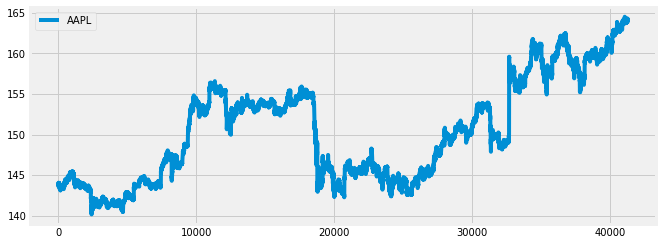

In [5]:
# show plots in the notebook
df_AAPL.plot(figsize=(10,4))

#### Data shows a clear trend, and possible seasonality also <br>
Since the dataset is NOT STATIONARY, the first step is to use differencing to make it a stationary time series

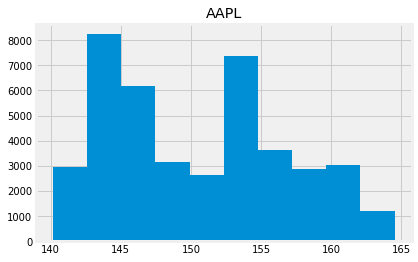

In [6]:
from pandas import Series
from matplotlib import pyplot
series = df_AAPL
series.hist()
pyplot.show()

#### The histogram shows that the stock prices were not normally distributed

In [26]:
from pandas import Series
series = df_AAPL
X = series.values
L = len(X)
split = int(L / 3)
last = L-split
X1, X2, X3 = X[0:split], X[split+1: last], X[last+1:]
mean1, mean2, mean3 = X1.mean(), X2.mean(), X3.mean()
var1, var2, var3 = X1.var(), X2.var(), X3.var()
print('mean1=         %f, mean2=        %f, mean3=        %f' % (mean1, mean2, mean3))
print('variance1=     %f, variance2=    %f, variance2=    %f' % (var1, var2, var3))

mean1=         146.987785, mean2=        148.207600, mean3=        156.165654
variance1=     24.315737, variance2=    19.309152, variance2=    23.387876


#### The simple test again shows that means and variances are NOT consistent

#### We may use Augmented Dickey Fuller Test to check for the statistical test of unit root (i.e. stationarity)
#### Null Hypothesis: Series is NOT stationary; Alternate Hypothesis: Series is stationary
##### So, p-value > 0.05 implies NON-STATIONARITY

In [61]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller

series = df['AAPL'].dropna()
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.912853
p-value: 0.783710
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


#### Here, p-value > 0.05, which means Null Hypothesis cannot be rejected, and thus the series is NOT STATIONARY

#### Let us do a simple log transformation to check if it makes it stationary

mean1=         4.989793, mean2=        4.998178, mean3=        5.050435
variance1=     0.001107, variance2=    0.000867, variance2=    0.000968


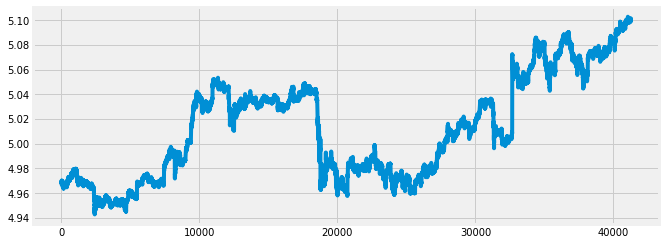

In [47]:
from pandas import Series
from numpy import log

series = df_AAPL
X = series.values
X = log(X)
L = len(X)
split = int(L / 3)
last = L-split
X1, X2, X3 = X[0:split], X[split+1: last], X[last+1:]
mean1, mean2, mean3 = X1.mean(), X2.mean(), X3.mean()
var1, var2, var3 = X1.var(), X2.var(), X3.var()
print('mean1=         %f, mean2=        %f, mean3=        %f' % (mean1, mean2, mean3))
print('variance1=     %f, variance2=    %f, variance2=    %f' % (var1, var2, var3))

# Checking the plots to see if log transformation has made it stationary or not

df['logAAPL']= np.log(df['AAPL'])
df['logAAPL'].plot(figsize=(10,4))

#### Numbers and chart above show that the log series is NOT stationary

#### First differencing may be the next trial run to see if this makes the series stationary

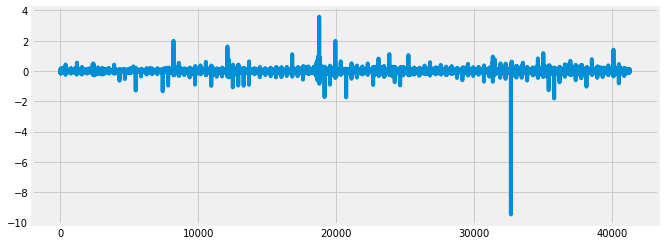

In [63]:
#df_AAPL.plot(figsize=(10,4))
df['dif_AAPL'] = df['AAPL'] - df['AAPL'].shift(periods=-1)
df['dif_AAPL'].plot(figsize=(10,4))

In [64]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller

series = df['dif_AAPL'].dropna()
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -35.737741
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


#### Here, p-value = 0, which is < 0.05; We may reject the NULL Hypothesis; So, the series with first differencing is stationary!!

#### Now, evaluating if the log first difference is also stationary

ADF Statistic: -35.706087
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


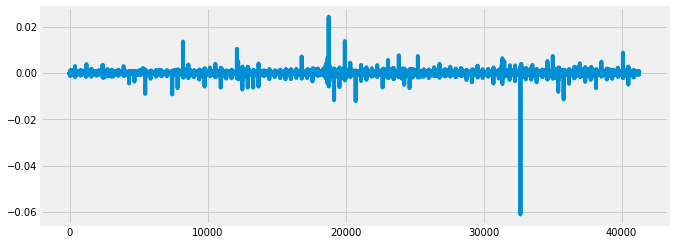

In [68]:
df['diflogAAPL'] = df['logAAPL'] - df['logAAPL'].shift(periods=-1)
df['diflogAAPL'].plot(figsize=(10,4))

from pandas import Series
from statsmodels.tsa.stattools import adfuller

series = df['diflogAAPL'].dropna()
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

#### Since p-value = 0, this log-first-difference series is STATIONARY; we can now proceed with ARIMA modeling

##### ---------------------------------------------------------------

#### Now, lets check for autocorrelations

In [73]:
sm.stats.durbin_watson(df['diflogAAPL'].dropna())

2.0184420398643126

The value of Durbin-Watson statistic is close to 2 if the errors are uncorrelated. <br>
In this case, it is 2. <br>
That means that there is a strong evidence that there is zero autocorrelation.<br>

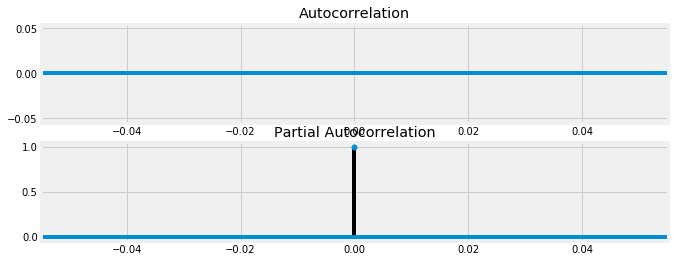

In [74]:
# Lets plot ACF and PACF plots

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['diflogAAPL'].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['diflogAAPL'], lags=40, ax=ax2)

#### ACF graph validates that there is zero autocorrelation - so, p = 0
#### PACF graph shows spike only at zero, so q = 0

In [77]:
df['DATE_F'] = df.DATE.apply(lambda x:time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)))

df['logAAPL']= np.log(df['AAPL'])
df['diflogAAPL'] = df['logAAPL'] - df['logAAPL'].shift(periods=-1) # first difference as earlier identified

df = df.dropna()

# Splitting the data into 2 - for model fit and for test

data = df[['DATE','DATE_F','AAPL','logAAPL','diflogAAPL']][:-100]
test = df[['DATE','DATE_F','AAPL','logAAPL','diflogAAPL']][-100:]


#### Using AIC score to identify the best combination of p, d, q parameters for ARIMA

In [89]:
ararray = (data.logAAPL.dropna().as_matrix())

p=0
q=0
d=1
pdq=[]
aic=[]

for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(ararray, (p,d,q)).fit()
            x = model.aic
            x1 = (p,d,q)
            
            print (x1, x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass
                        
keys = pdq
values = aic
d = dict(zip(keys, values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print ("Best Model is :", (p,d,q))


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(0, 1, 0) -491424.29994187655
(0, 1, 1) -491425.9256926867
(0, 1, 2) -491436.9839898711
(1, 1, 0) -491425.80221777863


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(1, 1, 1) -491426.28808854416
(1, 1, 2) -491437.6769410524
(2, 1, 0) -491436.7200997984
(2, 1, 1) -491437.1244589988
Best Model is : (1, 1, 2)


#### Now, to use the identified p, d, q parameters to fit the ARIMA model

In [90]:
ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()

In [91]:
ARIMIAmod.predict(typ = 'levels')

array([4.9675918 , 4.96772973, 4.96766032, ..., 5.09913551, 5.09931256,
       5.09913796])

In [92]:
data.loc[1:, 'predict'] = ARIMIAmod.predict(typ='levels')
data.head()

,DATE,DATE_F,AAPL,logAAPL,diflogAAPL,predict
0,1491226200,2017-04-03 19:00:00,143.6800,4.967589,-0.000139,NaN
1,1491226260,2017-04-03 19:01:00,143.7000,4.967728,0.000069,4.967592
2,1491226320,2017-04-03 19:02:00,143.6901,4.967659,0.000349,4.967730
3,1491226380,2017-04-03 19:03:00,143.6400,4.967310,-0.000139,4.967660
4,1491226440,2017-04-03 19:04:00,143.6600,4.967449,-0.000835,4.967319


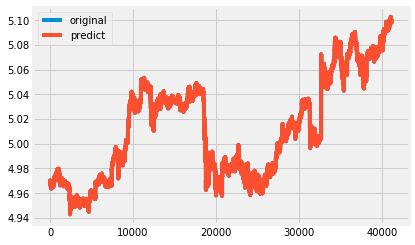

In [93]:
plt.plot(data['logAAPL'][1:], label='original')
plt.plot(data.predict[1:], label='predict')
plt.legend()

In [94]:
numofsteps = 10
stepahead = ARIMIAmod.forecast(numofsteps)[0]
ferrors = ARIMIAmod.forecast(numofsteps)[2]
ferrors

array([[5.0978687 , 5.10029291],
       [5.09737787, 5.10079031],
       [5.09701322, 5.10116129],
       [5.09670147, 5.10147944],
       [5.09642749, 5.10175979],
       [5.0961795 , 5.10201417],
       [5.09595155, 5.1022485 ],
       [5.09573943, 5.102467  ],
       [5.09554029, 5.10267253],
       [5.09535203, 5.10286717]])

In [97]:
data['error'] = (data['logAAPL'] - data['predict'])
data['sqrError'] = np.square(data['error'])
data['absError'] = np.abs(data['error'])
data.head()

,DATE,DATE_F,AAPL,logAAPL,diflogAAPL,predict,error,sqrError,absError
0,1491226200,2017-04-03 19:00:00,143.6800,4.967589,-0.000139,NaN,NaN,NaN,NaN
1,1491226260,2017-04-03 19:01:00,143.7000,4.967728,0.000069,4.967592,0.000136,1.849506e-08,0.000136
2,1491226320,2017-04-03 19:02:00,143.6901,4.967659,0.000349,4.967730,-0.000071,5.017208e-09,0.000071
3,1491226380,2017-04-03 19:03:00,143.6400,4.967310,-0.000139,4.967660,-0.000350,1.226073e-07,0.000350
4,1491226440,2017-04-03 19:04:00,143.6600,4.967449,-0.000835,4.967319,0.000131,1.710611e-08,0.000131


Text(0.5,0,'Month')

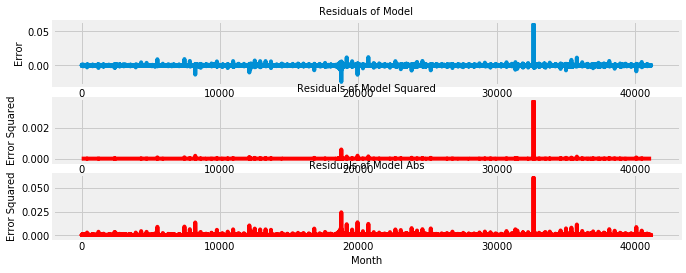

In [98]:
fig, ax = plt.subplots(figsize=(10,4))

plt.subplot(3, 1, 1)
plt.plot(data.error, label = "Residual")
plt.title("Residuals of Model", size = 10,)
plt.ylabel("Error", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 2)
plt.plot(data.sqrError, label = 'Residual Squared', color = 'r')
plt.title("Residuals of Model Squared", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 3)
plt.plot(data.absError, label = 'Residual Squared', color = 'r')
plt.title("Residuals of Model Abs", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

Text(0,0.5,'ACF')

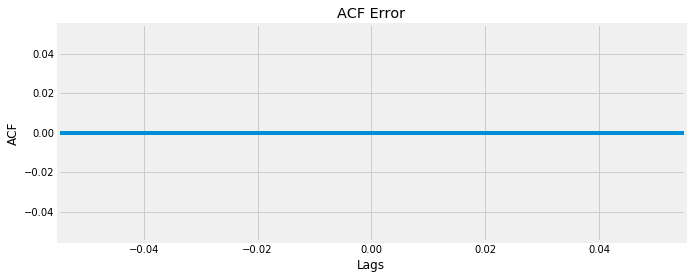

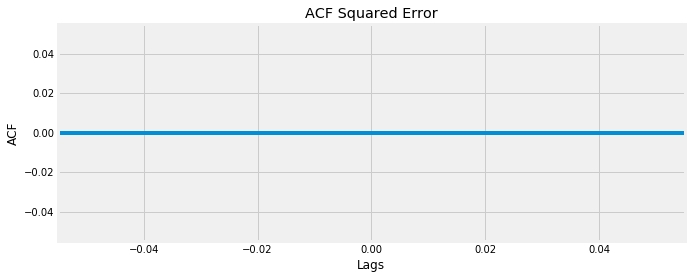

In [99]:
fig, ax = plt.subplots(figsize=(10,4))

plot_acf(data.error, lags = 25, ax = ax)
ax.set_title('ACF Error')
ax.set_xlabel('Lags')
ax.set_ylabel('ACF')

fig, ax = plt.subplots(figsize=(10,4))

plot_acf(data.sqrError, lags = 25, ax = ax)
ax.set_title('ACF Squared Error')
ax.set_xlabel('Lags')
ax.set_ylabel('ACF')

Text(0,0.5,'PACF')

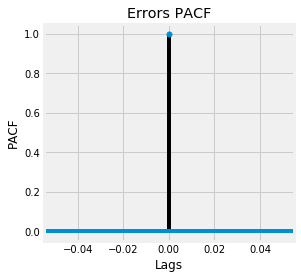

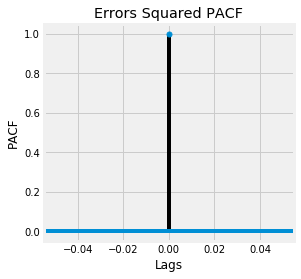

In [100]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(data.error, lags = 25, ax = ax)
ax.set_title('Errors PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(data.sqrError, lags = 25, ax = ax)
ax.set_title('Errors Squared PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

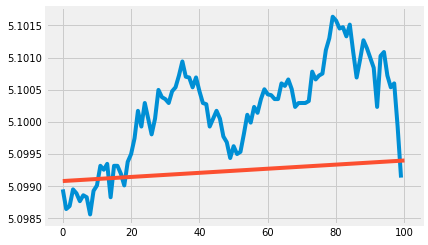

In [101]:
plt.plot(test.reset_index().logAAPL)
plt.plot(ARIMIAmod.predict(start=data.shape[0], end=data.shape[0]+100, typ='levels'))

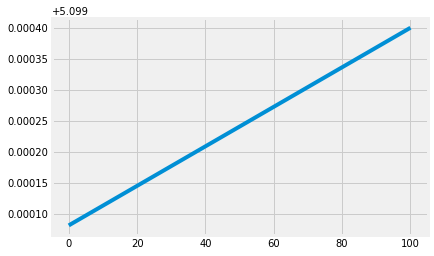

In [102]:
plt.plot(ARIMIAmod.predict(start=data.shape[0], end=data.shape[0]+100, typ='levels'))

#### Now, to apply the ARIMA model on test data

In [103]:
test = test.reset_index()

In [104]:
test_logAAPL = list(test.logAAPL.values)

In [105]:
ararray = list(data.logAAPL.values)
test_predict = []
for i in range(99):
    print(i)
    ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()
    test_predict.append(ARIMIAmod.forecast(1)[0])
    ararray.append(test_logAAPL[i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


20
21


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


22
23
24
25
26


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


27


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


28


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


29
30


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


31
32
33
34
35
36
37
38
39
40
41
42


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


43
44
45
46
47
48


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


49
50


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


51


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


52
53


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


54
55
56
57
58
59
60
61


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


62


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


63
64
65
66
67
68
69
70
71
72
73
74
75
76
77


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


78


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


79
80
81
82
83


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


84
85
86
87


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


88
89
90
91
92
93
94
95
96
97
98


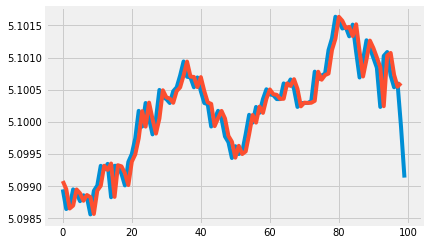

In [106]:
plt.plot(test_logAAPL)
plt.plot(np.array(test_predict).ravel())

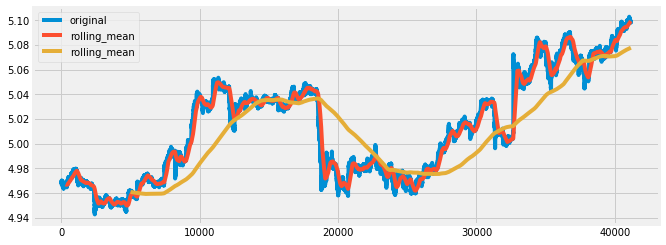

In [124]:
plt.figure(figsize=(10,4))
plt.plot(data.logAAPL, label='original')
plt.plot(data.logAAPL.rolling(300).mean(), label='rolling_mean')
plt.plot(data.logAAPL.rolling(5000).mean(), label='rolling_mean')
plt.legend()

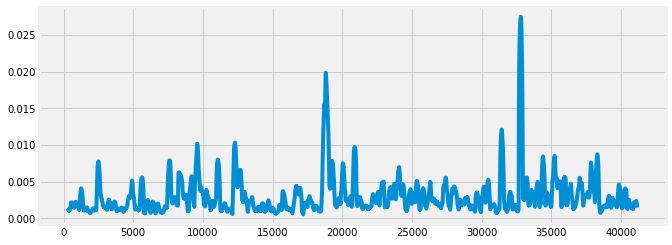

In [123]:
plt.figure(figsize=(10,4))
plt.plot(data.logAAPL.rolling(300).std())

In [109]:
data.head()

,DATE,DATE_F,AAPL,logAAPL,diflogAAPL,predict,error,sqrError,absError
0,1491226200,2017-04-03 19:00:00,143.6800,4.967589,-0.000139,NaN,NaN,NaN,NaN
1,1491226260,2017-04-03 19:01:00,143.7000,4.967728,0.000069,4.967592,0.000136,1.849506e-08,0.000136
2,1491226320,2017-04-03 19:02:00,143.6901,4.967659,0.000349,4.967730,-0.000071,5.017208e-09,0.000071
3,1491226380,2017-04-03 19:03:00,143.6400,4.967310,-0.000139,4.967660,-0.000350,1.226073e-07,0.000350
4,1491226440,2017-04-03 19:04:00,143.6600,4.967449,-0.000835,4.967319,0.000131,1.710611e-08,0.000131


In [122]:
import numpy as np

def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100

print("MFE = ", mean_forecast_err(data.AAPL, np.exp(data.predict)))
print("MAE = ", mean_absolute_err(data.AAPL, np.exp(data.predict)))

MFE =  1.1268310828585389e-05
MAE =  7.503849244172472e-08


#### Mean Forecast error is practically zero; this shows that ARIMA is a great fit

### -----------------------------------------------------------------------------

### Second stock: ADP
#### Will repeat the same steps as done for the first stock

In [15]:
df['DATE_F'] = df.DATE.apply(lambda x:time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)))
df['logADP']= np.log(df['ADP'])
df['diflogADP'] = df['logADP'] - df['logADP'].shift(periods=-1)
df = df.dropna()

In [16]:
# Splitting the data into 2 - for model fit and for test
data = df[['DATE','DATE_F','ADP','logADP','diflogADP']][:-100]
test = df[['DATE','DATE_F','ADP','logADP','diflogADP']][-100:]

In [18]:
print("Size of data ", data.shape)
print("Size of test ", test.shape)

Size of data  (41159, 5)
Size of test  (100, 5)


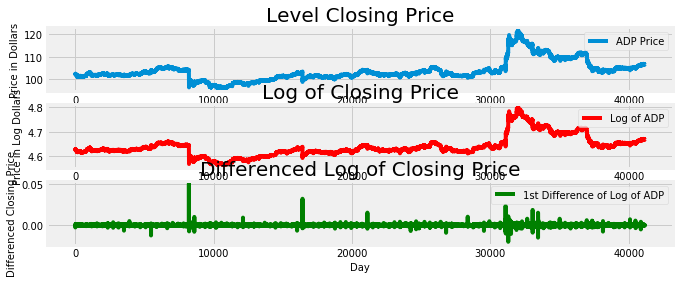

In [22]:
# Plotting the series and its transformation to check for stationarity

fig, ax = plt.subplots(figsize=(10,4))

plt.subplot(3, 1, 1)
plt.plot(data.ADP, label = "ADP Price")
plt.title("Level Closing Price", size = 20,)
plt.ylabel("Price in Dollars", size = 10)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data.logADP, label = 'Log of ADP', color = 'r')
plt.title("Log of Closing Price", size = 20,)
plt.ylabel("Price in Log Dollars", size = 10)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot( data.diflogADP, label = '1st Difference of Log of ADP', color = 'g')
plt.title("Differenced Log of Closing Price", size = 20,)
plt.ylabel("Differenced Closing Price", size = 10)
plt.xlabel('Day', size = 10)
plt.legend()

In [21]:
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(data.diflogADP, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -30.708926
p-value                            0.000000
# Lags Used                       39.000000
Number of Observations Used    41119.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


#### Since p-value = 0, this log-first-difference series is STATIONARY; we can now proceed with ARIMA modeling

First check for autocorrelation

In [23]:
sm.stats.durbin_watson(df['diflogADP'].dropna())

1.88048336704048

#### Since DW statistic is close to 2, we can say that there is minimum auto-correlation

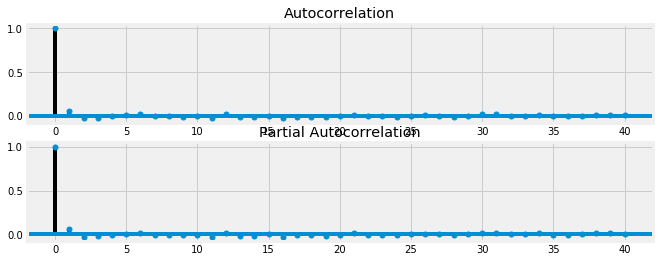

In [25]:
# Lets plot ACF and PACF plots

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['diflogADP'].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['diflogADP'], lags=40, ax=ax2)

In [26]:
# To systematically find the ARIMA model parameters

ararray = (data.logADP.dropna().as_matrix())

p=0
q=0
d=1
pdq=[]
aic=[]

for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(ararray, (p,d,q)).fit()
            x = model.aic
            x1 = (p,d,q)
            
            print (x1, x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass
                        
keys = pdq
values = aic
d = dict(zip(keys, values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print ("Best Model is :", (p,d,q))

C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(0, 1, 0) -481200.097091086
(0, 1, 1) -481351.98896089516


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(0, 1, 2) -481365.79395077605
(1, 1, 0) -481345.114273646
(1, 1, 1) -481360.4428809238
(1, 1, 2) -481374.0139784589
(2, 1, 0) -481371.73728678917
(2, 1, 1) -481376.5646028942
(2, 1, 2) -481385.2289467592
Best Model is : (2, 1, 2)


#### Use the identified parameters to fit the ARIMA model

In [27]:
ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()

In [28]:
data.loc[1:, 'predict'] = ARIMIAmod.predict(typ='levels')
data.head()

,DATE,DATE_F,ADP,logADP,diflogADP,predict
0,1491226200,2017-04-03 19:00:00,102.2300,4.627225,0.000881,NaN
1,1491226260,2017-04-03 19:01:00,102.1400,4.626344,-0.000710,4.627226
2,1491226320,2017-04-03 19:02:00,102.2125,4.627054,0.000710,4.626293
3,1491226380,2017-04-03 19:03:00,102.1400,4.626344,0.000784,4.627121
4,1491226440,2017-04-03 19:04:00,102.0600,4.625561,0.000196,4.626302


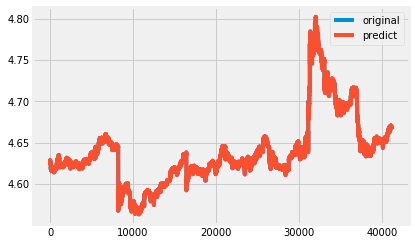

In [29]:
plt.plot(data['logADP'][1:], label='original')
plt.plot(data.predict[1:], label='predict')
plt.legend()

In [30]:
numofsteps = 10
stepahead = ARIMIAmod.forecast(numofsteps)[0]
ferrors = ARIMIAmod.forecast(numofsteps)[2]
ferrors

array([[4.66742436, 4.67016099],
       [4.66679834, 4.67078796],
       [4.66634625, 4.67124694],
       [4.66597978, 4.67161722],
       [4.66565585, 4.67194249],
       [4.66535966, 4.67224002],
       [4.66508645, 4.67251521],
       [4.66483254, 4.67277129],
       [4.66459432, 4.67301157],
       [4.66436897, 4.67323891]])

In [32]:
data['error'] = (data['logADP'] - data['predict'])
data['sqrError'] = np.square(data['error'])
data['absError'] = np.abs(data['error'])
data.head()

,DATE,DATE_F,ADP,logADP,diflogADP,predict,error,sqrError,absError
0,1491226200,2017-04-03 19:00:00,102.2300,4.627225,0.000881,NaN,NaN,NaN,NaN
1,1491226260,2017-04-03 19:01:00,102.1400,4.626344,-0.000710,4.627226,-0.000882,7.775030e-07,0.000882
2,1491226320,2017-04-03 19:02:00,102.2125,4.627054,0.000710,4.626293,0.000761,5.795011e-07,0.000761
3,1491226380,2017-04-03 19:03:00,102.1400,4.626344,0.000784,4.627121,-0.000777,6.033832e-07,0.000777
4,1491226440,2017-04-03 19:04:00,102.0600,4.625561,0.000196,4.626302,-0.000741,5.486463e-07,0.000741


Text(0,0.5,'PACF')

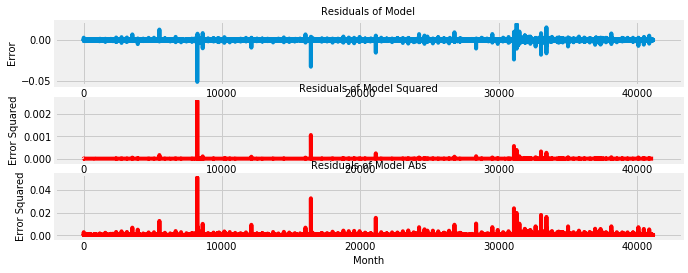

In [36]:
fig, ax = plt.subplots(figsize=(10,4))

plt.subplot(3, 1, 1)
plt.plot(data.error, label = "Residual")
plt.title("Residuals of Model", size = 10,)
plt.ylabel("Error", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 2)
plt.plot(data.sqrError, label = 'Residual Squared', color = 'r')
plt.title("Residuals of Model Squared", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 3)
plt.plot(data.absError, label = 'Residual Squared', color = 'r')
plt.title("Residuals of Model Abs", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)




Text(0,0.5,'ACF')

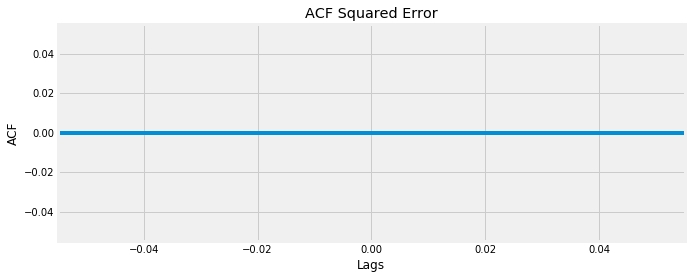

In [39]:
fig, ax = plt.subplots(figsize=(10,4))

plot_acf(data.error, lags = 25, ax = ax)
ax.set_title('ACF Error')
ax.set_xlabel('Lags')
ax.set_ylabel('ACF')

plot_acf(data.sqrError, lags = 25, ax = ax)
ax.set_title('ACF Squared Error')
ax.set_xlabel('Lags')
ax.set_ylabel('ACF')



Text(0,0.5,'PACF')

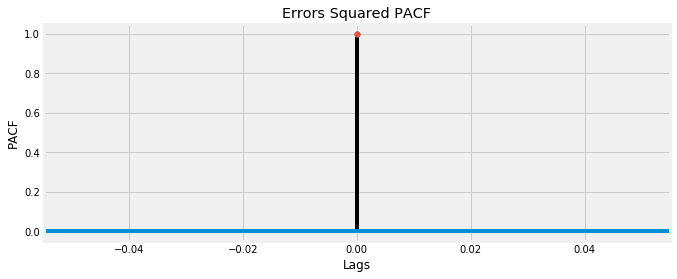

In [40]:
fig, ax = plt.subplots(figsize=(10,4))

plot_pacf(data.error, lags = 25, ax = ax)
ax.set_title('Errors PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

plot_pacf(data.sqrError, lags = 25, ax = ax)
ax.set_title('Errors Squared PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

#### Now, to run the ARIMA model on test data

C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


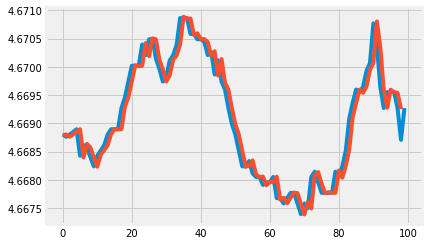

In [41]:
test = test.reset_index()
test_logADP = list(test.logADP.values)

ararray = list(data.logADP.values)
test_predict = []
for i in range(99):
    #print(i)
    ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()
    test_predict.append(ARIMIAmod.forecast(1)[0])
    ararray.append(test_logADP[i])
    
plt.plot(test_logADP)
plt.plot(np.array(test_predict).ravel())

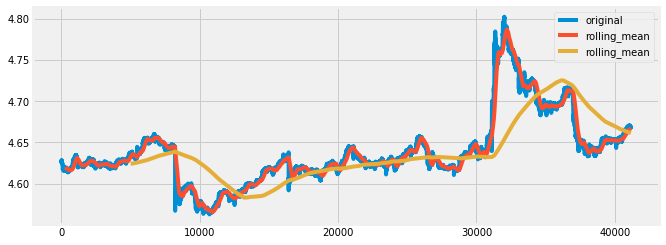

In [42]:
plt.figure(figsize=(10,4))
plt.plot(data.logADP, label='original')
plt.plot(data.logADP.rolling(300).mean(), label='rolling_mean')
plt.plot(data.logADP.rolling(5000).mean(), label='rolling_mean')
plt.legend()

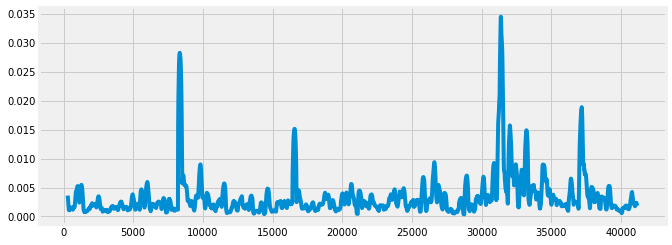

In [43]:
plt.figure(figsize=(10,4))
plt.plot(data.logADP.rolling(300).std())

In [44]:
data.head()

,DATE,DATE_F,ADP,logADP,diflogADP,predict,error,sqrError,absError
0,1491226200,2017-04-03 19:00:00,102.2300,4.627225,0.000881,NaN,NaN,NaN,NaN
1,1491226260,2017-04-03 19:01:00,102.1400,4.626344,-0.000710,4.627226,-0.000882,7.775030e-07,0.000882
2,1491226320,2017-04-03 19:02:00,102.2125,4.627054,0.000710,4.626293,0.000761,5.795011e-07,0.000761
3,1491226380,2017-04-03 19:03:00,102.1400,4.626344,0.000784,4.627121,-0.000777,6.033832e-07,0.000777
4,1491226440,2017-04-03 19:04:00,102.0600,4.625561,0.000196,4.626302,-0.000741,5.486463e-07,0.000741


In [45]:
import numpy as np

def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100

print("MFE = ", mean_forecast_err(data.ADP, np.exp(data.predict)))
print("MAE = ", mean_absolute_err(data.ADP, np.exp(data.predict)))

MFE =  7.403848832201379e-07
MAE =  7.167796791546908e-09


#### Mean Forecast error is practically zero; this shows that ARIMA is a great fit

#### ----------------------

#### Now, for the third stock in portfolio: CBOE

In [50]:
df['DATE_F'] = df.DATE.apply(lambda x:time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)))
df['logCBOE']= np.log(df['CBOE'])
df['diflogCBOE'] = df['logCBOE'] - df['logCBOE'].shift(periods=-1)
df = df.dropna()

In [51]:
# Splitting the data into 2 - for model fit and for test
data = df[['DATE','DATE_F','CBOE','logCBOE','diflogCBOE']][:-100]
test = df[['DATE','DATE_F','CBOE','logCBOE','diflogCBOE']][-100:]

In [52]:
print("Size of data ", data.shape)
print("Size of test ", test.shape)

Size of data  (41165, 5)
Size of test  (100, 5)


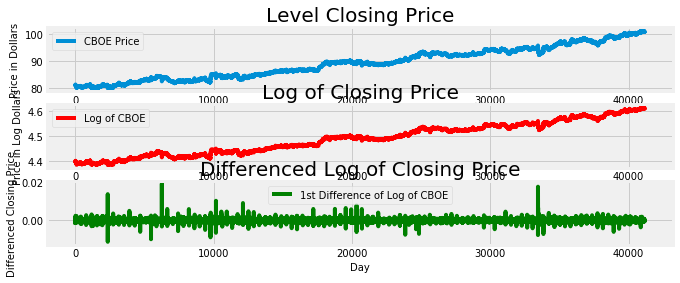

In [53]:
# Plotting the series and its transformation to check for stationarity

fig, ax = plt.subplots(figsize=(10,4))

plt.subplot(3, 1, 1)
plt.plot(data.CBOE, label = "CBOE Price")
plt.title("Level Closing Price", size = 20,)
plt.ylabel("Price in Dollars", size = 10)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data.logCBOE, label = 'Log of CBOE', color = 'r')
plt.title("Log of Closing Price", size = 20,)
plt.ylabel("Price in Log Dollars", size = 10)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot( data.diflogCBOE, label = '1st Difference of Log of CBOE', color = 'g')
plt.title("Differenced Log of Closing Price", size = 20,)
plt.ylabel("Differenced Closing Price", size = 10)
plt.xlabel('Day', size = 10)
plt.legend()

In [54]:
#Perform Dickey-Fuller test TO TEST FOR STATIONARITY:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(data.diflogCBOE, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -42.148544
p-value                            0.000000
# Lags Used                       25.000000
Number of Observations Used    41139.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


#### Since p-value = 0, this log-first-difference series is STATIONARY; we can now proceed with ARIMA modeling

In [56]:
# Now, check for Autocorrelation
sm.stats.durbin_watson(df['diflogCBOE'].dropna())

2.1531316991494767

#### Since DW statistic is close to 2, we can say that there is minimum auto-correlation

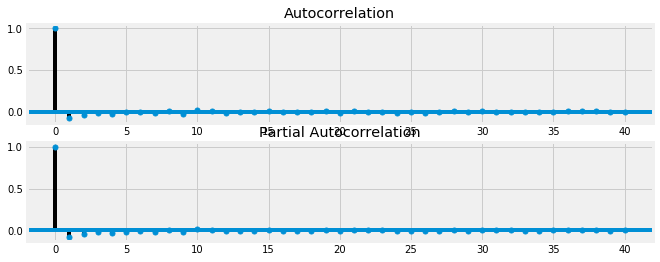

In [57]:
# Lets plot ACF and PACF plots

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['diflogCBOE'].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['diflogCBOE'], lags=40, ax=ax2)

In [58]:
# To systematically find the ARIMA model parameters

ararray = (data.logCBOE.dropna().as_matrix())

p=0
q=0
d=1
pdq=[]
aic=[]

for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(ararray, (p,d,q)).fit()
            x = model.aic
            x1 = (p,d,q)
            
            print (x1, x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass
                        
keys = pdq
values = aic
d = dict(zip(keys, values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print ("Best Model is :", (p,d,q))

C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(0, 1, 0) -504765.6499751676
(0, 1, 1) -505031.00379674253
(0, 1, 2) -505121.943433363
(1, 1, 0) -505008.09969908395
(1, 1, 1) -505165.6162039692
(1, 1, 2) -505157.5706475206
(2, 1, 0) -505103.3907995743
(2, 1, 1) -505158.7642709896
(2, 1, 2) -505164.93330915703
Best Model is : (1, 1, 1)


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [59]:
# Now, fit the ARIMA for the best parameters
ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()

In [61]:
data.loc[1:, 'predict'] = np.exp(ARIMIAmod.predict(typ='levels'))
data.head()

,DATE,DATE_F,CBOE,logCBOE,diflogCBOE,predict
0,1491226200,2017-04-03 19:00:00,81.03,4.394819,-0.002219,NaN
1,1491226260,2017-04-03 19:01:00,81.21,4.397038,0.000000,81.030430
2,1491226320,2017-04-03 19:02:00,81.21,4.397038,0.000986,81.196536
3,1491226380,2017-04-03 19:03:00,81.13,4.396053,0.000123,81.202207
4,1491226440,2017-04-03 19:04:00,81.12,4.395930,-0.001232,81.132137


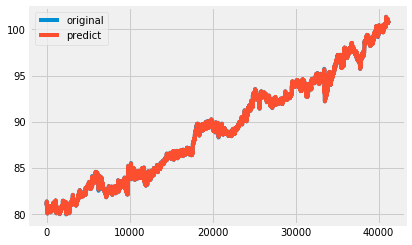

In [62]:
plt.plot(data['CBOE'][1:], label='original')
plt.plot(data.predict[1:], label='predict')
plt.legend()

In [63]:
numofsteps = 10
stepahead = ARIMIAmod.forecast(numofsteps)[0]
ferrors = ARIMIAmod.forecast(numofsteps)[2]
ferrors

array([[4.61260786, 4.61465979],
       [4.61224402, 4.61502835],
       [4.61198364, 4.61529631],
       [4.61177125, 4.61551775],
       [4.61158671, 4.6157121 ],
       [4.61142064, 4.61588837],
       [4.61126796, 4.61605144],
       [4.61112565, 4.61620425],
       [4.61099174, 4.61634871],
       [4.61086485, 4.61648618]])

In [64]:
data['error'] = (data['CBOE'] - data['predict'])
data['sqrError'] = np.square(data['error'])
data['absError'] = np.abs(data['error'])
data.head()

,DATE,DATE_F,CBOE,logCBOE,diflogCBOE,predict,error,sqrError,absError
0,1491226200,2017-04-03 19:00:00,81.03,4.394819,-0.002219,NaN,NaN,NaN,NaN
1,1491226260,2017-04-03 19:01:00,81.21,4.397038,0.000000,81.030430,0.179570,0.032245,0.179570
2,1491226320,2017-04-03 19:02:00,81.21,4.397038,0.000986,81.196536,0.013464,0.000181,0.013464
3,1491226380,2017-04-03 19:03:00,81.13,4.396053,0.000123,81.202207,-0.072207,0.005214,0.072207
4,1491226440,2017-04-03 19:04:00,81.12,4.395930,-0.001232,81.132137,-0.012137,0.000147,0.012137


Text(0.5,0,'Month')

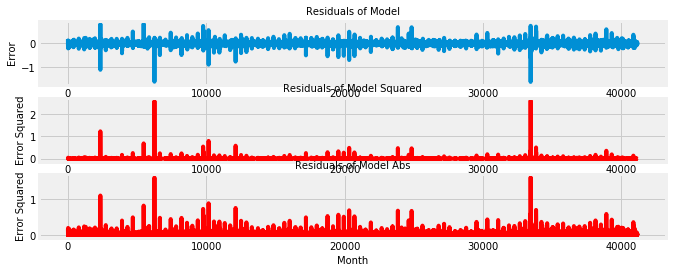

In [65]:
fig, ax = plt.subplots(figsize=(10,4))

plt.subplot(3, 1, 1)
plt.plot(data.error, label = "Residual")
plt.title("Residuals of Model", size = 10,)
plt.ylabel("Error", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 2)
plt.plot(data.sqrError, label = 'Residual Squared', color = 'r')
plt.title("Residuals of Model Squared", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 3)
plt.plot(data.absError, label = 'Residual Squared', color = 'r')
plt.title("Residuals of Model Abs", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

Text(0,0.5,'ACF')

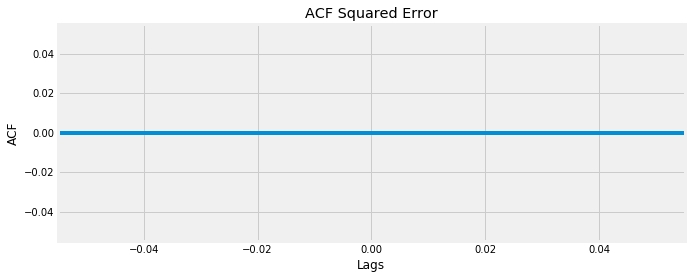

In [66]:
fig, ax = plt.subplots(figsize=(10,4))

plot_acf(data.error, lags = 25, ax = ax)
ax.set_title('ACF Error')
ax.set_xlabel('Lags')
ax.set_ylabel('ACF')

plot_acf(data.sqrError, lags = 25, ax = ax)
ax.set_title('ACF Squared Error')
ax.set_xlabel('Lags')
ax.set_ylabel('ACF')

Text(0,0.5,'PACF')

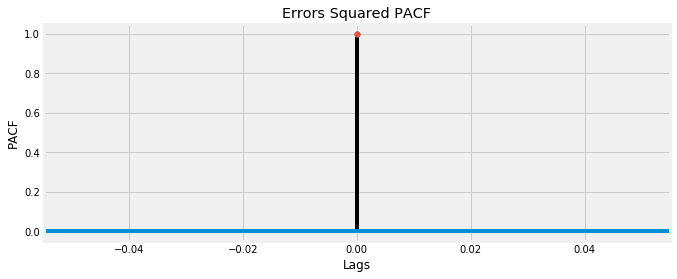

In [67]:
fig, ax = plt.subplots(figsize=(10,4))

plot_pacf(data.error, lags = 25, ax = ax)
ax.set_title('Errors PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

plot_pacf(data.sqrError, lags = 25, ax = ax)
ax.set_title('Errors Squared PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

#### Now, run ARIMA model on Test data

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


95
96
97
98


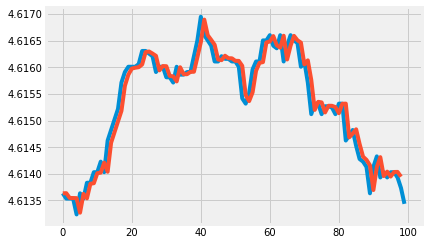

In [68]:
test = test.reset_index()
test_logCBOE = list(test.logCBOE.values)

ararray = list(data.logCBOE.values)
test_predict = []
for i in range(99):
    print(i)
    ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()
    test_predict.append(ARIMIAmod.forecast(1)[0])
    ararray.append(test_logCBOE[i])
    
plt.plot(test_logCBOE)
plt.plot(np.array(test_predict).ravel())

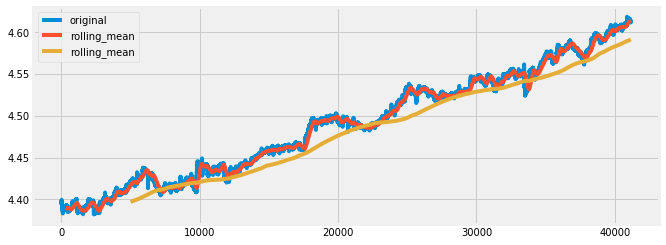

In [69]:
plt.figure(figsize=(10,4))
plt.plot(data.logCBOE, label='original')
plt.plot(data.logCBOE.rolling(300).mean(), label='rolling_mean')
plt.plot(data.logCBOE.rolling(5000).mean(), label='rolling_mean')
plt.legend()

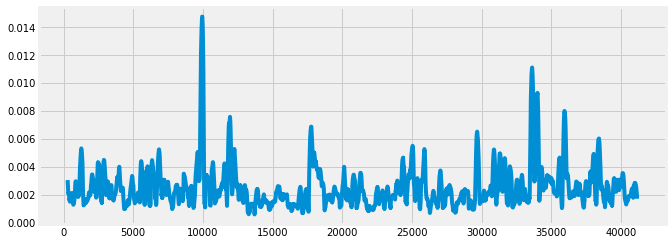

In [70]:
plt.figure(figsize=(10,4))
plt.plot(data.logCBOE.rolling(300).std())

In [71]:
data.head()

,DATE,DATE_F,CBOE,logCBOE,diflogCBOE,predict,error,sqrError,absError
0,1491226200,2017-04-03 19:00:00,81.03,4.394819,-0.002219,NaN,NaN,NaN,NaN
1,1491226260,2017-04-03 19:01:00,81.21,4.397038,0.000000,81.030430,0.179570,0.032245,0.179570
2,1491226320,2017-04-03 19:02:00,81.21,4.397038,0.000986,81.196536,0.013464,0.000181,0.013464
3,1491226380,2017-04-03 19:03:00,81.13,4.396053,0.000123,81.202207,-0.072207,0.005214,0.072207
4,1491226440,2017-04-03 19:04:00,81.12,4.395930,-0.001232,81.132137,-0.012137,0.000147,0.012137


In [73]:
import numpy as np

def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100

print("MFE = ", mean_forecast_err(data.CBOE, data.predict))
print("MAE = ", mean_absolute_err(data.CBOE, data.predict))

MFE =  1.1521104657737748e-05
MAE =  1.2954842900978885e-07


#### Mean Forecast error is practically zero; this shows that ARIMA is a great fit

### --------------------------------------------

#### The fourth stock in the list: CSCO

In [5]:
df['DATE_F'] = df.DATE.apply(lambda x:time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)))
df['logCSCO']= np.log(df['CSCO'])
df['diflogCSCO'] = df['logCSCO'] - df['logCSCO'].shift(periods=-1)
df = df.dropna()

In [6]:
# Splitting the data into 2 - for model fit and for test
data = df[['DATE','DATE_F','CSCO','logCSCO','diflogCSCO']][:-100]
test = df[['DATE','DATE_F','CSCO','logCSCO','diflogCSCO']][-100:]

In [7]:
print("Size of data ", data.shape)
print("Size of test ", test.shape)

Size of data  (41165, 5)
Size of test  (100, 5)


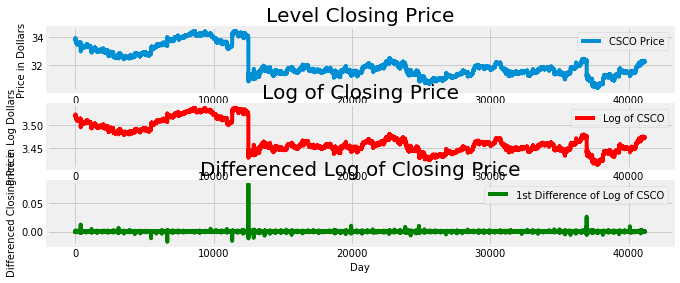

In [9]:
# Plotting the series and its transformation to check for stationarity

fig, ax = plt.subplots(figsize=(10,4))

plt.subplot(3, 1, 1)
plt.plot(data.CSCO, label = "CSCO Price")
plt.title("Level Closing Price", size = 20,)
plt.ylabel("Price in Dollars", size = 10)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data.logCSCO, label = 'Log of CSCO', color = 'r')
plt.title("Log of Closing Price", size = 20,)
plt.ylabel("Price in Log Dollars", size = 10)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot( data.diflogCSCO, label = '1st Difference of Log of CSCO', color = 'g')
plt.title("Differenced Log of Closing Price", size = 20,)
plt.ylabel("Differenced Closing Price", size = 10)
plt.xlabel('Day', size = 10)
plt.legend()

In [10]:
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(data.diflogCSCO, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -30.335972
p-value                            0.000000
# Lags Used                       46.000000
Number of Observations Used    41118.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


#### Since p-value = 0, this log-first-difference series is STATIONARY; we can now proceed with ARIMA modeling

In [11]:
# Check for autocorrelation
sm.stats.durbin_watson(df['diflogCSCO'].dropna())

1.966773928376368

#### Since DW statistic is close to 2, we can say that there is minimum auto-correlation

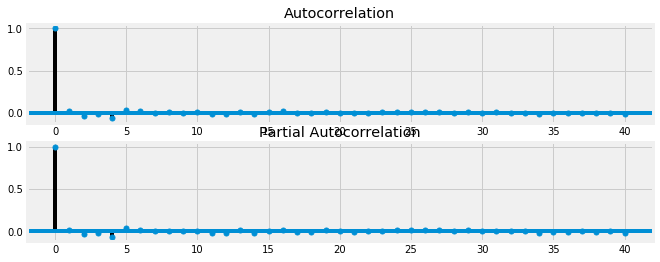

In [13]:
# Lets plot ACF and PACF plots

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['diflogCSCO'].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['diflogCSCO'], lags=40, ax=ax2)

In [14]:
# To systematically find the ARIMA model parameters

ararray = (data.logCSCO.dropna().as_matrix())

p=0
q=0
d=1
pdq=[]
aic=[]

for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(ararray, (p,d,q)).fit()
            x = model.aic
            x1 = (p,d,q)
            
            print (x1, x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass
                        
keys = pdq
values = aic
d = dict(zip(keys, values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print ("Best Model is :", (p,d,q))

C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(0, 1, 0) -485601.9598770776
(0, 1, 1) -485611.3595994654
(0, 1, 2) -485672.21268416464
(1, 1, 0) -485610.57417967566


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(1, 1, 1) -485612.1297788699


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(1, 1, 2) -485671.7452910226
(2, 1, 0) -485666.40607205464


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(2, 1, 1) -485664.7755561704
(2, 1, 2) -485681.7204381989
Best Model is : (2, 1, 2)


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


#### Use the identified parameters to fit the ARIMA model

In [15]:
ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()

C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [20]:
data.loc[1:, 'predict'] = np.exp(ARIMIAmod.predict(typ='levels'))
data.head()

,DATE,DATE_F,CSCO,logCSCO,diflogCSCO,predict,error,sqrError,absError
0,1491226200,2017-04-03 19:00:00,33.7400,3.518684,-0.004141,NaN,NaN,NaN,NaN
1,1491226260,2017-04-03 19:01:00,33.8800,3.522825,-0.000590,33.739963,0.004142,1.715514e-05,0.004142
2,1491226320,2017-04-03 19:02:00,33.9000,3.523415,0.001479,33.882182,0.000526,2.764110e-07,0.000526
3,1491226380,2017-04-03 19:03:00,33.8499,3.521936,0.000293,33.895006,-0.001332,1.773297e-06,0.001332
4,1491226440,2017-04-03 19:04:00,33.8400,3.521644,-0.001181,33.848415,-0.000249,6.181858e-08,0.000249


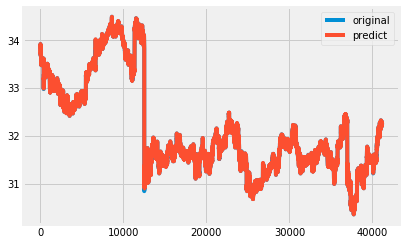

In [22]:
plt.plot(data['CSCO'][1:], label='original')
plt.plot(data.predict[1:], label='predict')
plt.legend()

In [23]:
numofsteps = 10
stepahead = ARIMIAmod.forecast(numofsteps)[0]
ferrors = ARIMIAmod.forecast(numofsteps)[2]
ferrors

array([[3.47299236, 3.47559206],
       [3.47243612, 3.47614299],
       [3.47204027, 3.4765366 ],
       [3.47170413, 3.47687034],
       [3.47140834, 3.47716396],
       [3.4711401 , 3.47743001],
       [3.47089294, 3.477675  ],
       [3.47066247, 3.4779033 ],
       [3.47044571, 3.47811789],
       [3.47024044, 3.47832099]])

In [24]:
data['error'] = (data['CSCO'] - data['predict'])
data['sqrError'] = np.square(data['error'])
data['absError'] = np.abs(data['error'])
data.head()

,DATE,DATE_F,CSCO,logCSCO,diflogCSCO,predict,error,sqrError,absError
0,1491226200,2017-04-03 19:00:00,33.7400,3.518684,-0.004141,NaN,NaN,NaN,NaN
1,1491226260,2017-04-03 19:01:00,33.8800,3.522825,-0.000590,33.739963,0.140037,0.019610,0.140037
2,1491226320,2017-04-03 19:02:00,33.9000,3.523415,0.001479,33.882182,0.017818,0.000317,0.017818
3,1491226380,2017-04-03 19:03:00,33.8499,3.521936,0.000293,33.895006,-0.045106,0.002035,0.045106
4,1491226440,2017-04-03 19:04:00,33.8400,3.521644,-0.001181,33.848415,-0.008415,0.000071,0.008415


Text(0.5,0,'Month')

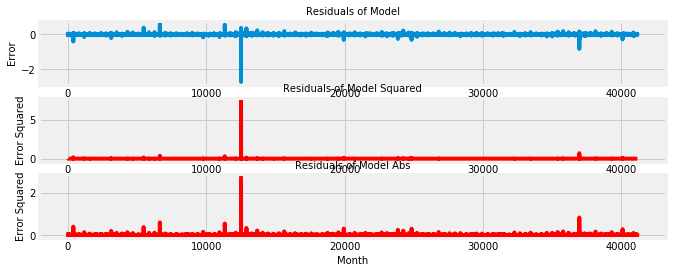

In [25]:
fig, ax = plt.subplots(figsize=(10,4))

plt.subplot(3, 1, 1)
plt.plot(data.error, label = "Residual")
plt.title("Residuals of Model", size = 10,)
plt.ylabel("Error", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 2)
plt.plot(data.sqrError, label = 'Residual Squared', color = 'r')
plt.title("Residuals of Model Squared", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 3)
plt.plot(data.absError, label = 'Residual Squared', color = 'r')
plt.title("Residuals of Model Abs", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)


Text(0,0.5,'ACF')

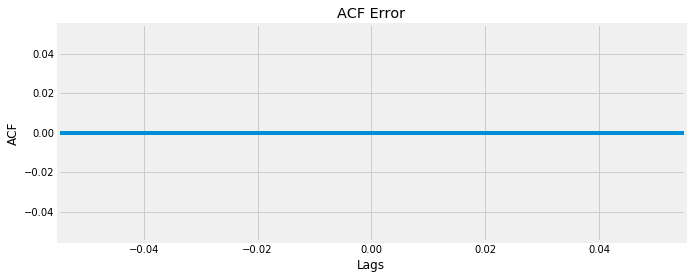

In [26]:
fig, ax = plt.subplots(figsize=(10,4))

plot_acf(data.error, lags = 25, ax = ax)
ax.set_title('ACF Error')
ax.set_xlabel('Lags')
ax.set_ylabel('ACF')

Text(0,0.5,'ACF')

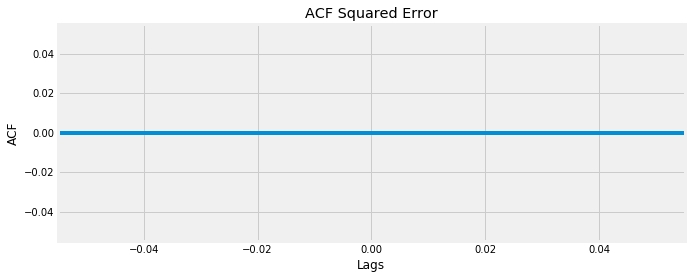

In [28]:
fig, ax = plt.subplots(figsize=(10,4))
plot_acf(data.sqrError, lags = 25, ax = ax)
ax.set_title('ACF Squared Error')
ax.set_xlabel('Lags')
ax.set_ylabel('ACF')

Text(0,0.5,'PACF')

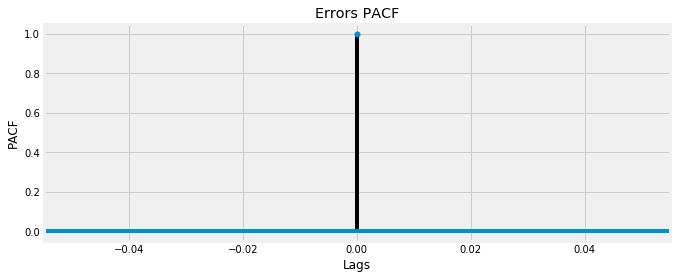

In [29]:
fig, ax = plt.subplots(figsize=(10,4))

plot_pacf(data.error, lags = 25, ax = ax)
ax.set_title('Errors PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')


Text(0,0.5,'PACF')

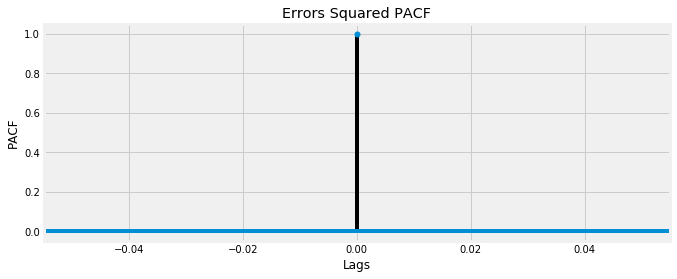

In [30]:
fig, ax = plt.subplots(figsize=(10,4))

plot_pacf(data.sqrError, lags = 25, ax = ax)
ax.set_title('Errors Squared PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

#### Now, to run the ARIMA model on test data

0


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


3


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


4


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


5


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


6


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


7


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


9


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


10


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


11


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


12


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


13


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


14


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


15


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


16


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


17


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


18


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


19


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


20


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


21


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


22


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


23


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


24


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


25


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


26


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


27


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


28


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


29


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


30


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


31


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


32


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


33


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


34


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


35


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


36


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


37


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


38


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


39


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


40


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


41


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


42


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


43


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


44


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


45


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


46


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


47


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


48


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


49


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


50


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


51


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


52


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


53


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


54


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


55


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


56


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


57


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


58


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


59


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


60


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


61


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


62


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


63


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


64


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


65


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


66


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


67


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


68


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


69


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


70


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


71


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


72


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


73


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


74


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


75


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


76


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


77


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


78


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


79


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


80


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


81


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


82


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


83


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


84


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


85


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


86


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


87


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


88


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


89


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


90


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


91


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


92


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


93


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


94


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


95


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


96


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


97


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


98


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


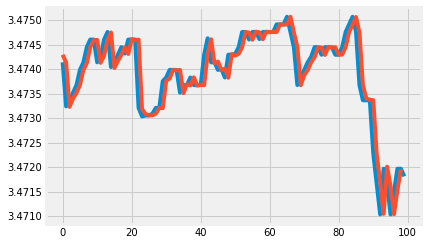

In [32]:
test = test.reset_index()
test_logCSCO = list(test.logCSCO.values)

ararray = list(data.logCSCO.values)
test_predict = []
for i in range(99):
    print(i)
    ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()
    test_predict.append(ARIMIAmod.forecast(1)[0])
    ararray.append(test_logCSCO[i])
    
plt.plot(test_logCSCO)
plt.plot(np.array(test_predict).ravel())

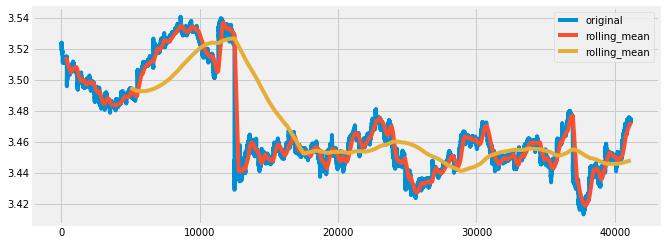

In [33]:
plt.figure(figsize=(10,4))
plt.plot(data.logCSCO, label='original')
plt.plot(data.logCSCO.rolling(300).mean(), label='rolling_mean')
plt.plot(data.logCSCO.rolling(5000).mean(), label='rolling_mean')
plt.legend()

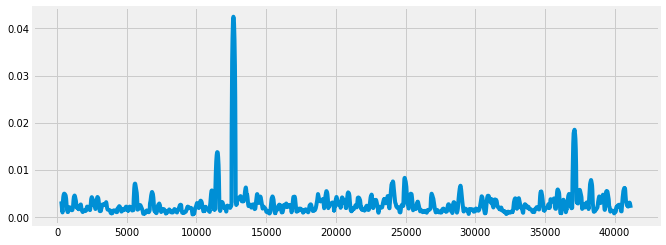

In [34]:
plt.figure(figsize=(10,4))
plt.plot(data.logCSCO.rolling(300).std())

In [35]:
data.head()

,DATE,DATE_F,CSCO,logCSCO,diflogCSCO,predict,error,sqrError,absError
0,1491226200,2017-04-03 19:00:00,33.7400,3.518684,-0.004141,NaN,NaN,NaN,NaN
1,1491226260,2017-04-03 19:01:00,33.8800,3.522825,-0.000590,33.739963,0.140037,0.019610,0.140037
2,1491226320,2017-04-03 19:02:00,33.9000,3.523415,0.001479,33.882182,0.017818,0.000317,0.017818
3,1491226380,2017-04-03 19:03:00,33.8499,3.521936,0.000293,33.895006,-0.045106,0.002035,0.045106
4,1491226440,2017-04-03 19:04:00,33.8400,3.521644,-0.001181,33.848415,-0.008415,0.000071,0.008415


In [39]:
import numpy as np

def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100

print("MFE = ", mean_forecast_err(data.CSCO, data.predict))
print("MAE = ", mean_absolute_err(data.CSCO, data.predict))

MFE =  -5.989644758804684e-07
MAE =  1.865383994005762e-08


#### Mean Forecast error is practically zero; this shows that ARIMA is a great fit
### ----------------------------------

#### Now, for the FIFTH stock in portfolio : EBAY

In [40]:
df['DATE_F'] = df.DATE.apply(lambda x:time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)))
df['logEBAY']= np.log(df['EBAY'])
df['diflogEBAY'] = df['logEBAY'] - df['logEBAY'].shift(periods=-1)
df = df.dropna()

In [41]:
# Splitting the data into 2 - for model fit and for test
data = df[['DATE','DATE_F','EBAY','logEBAY','diflogEBAY']][:-100]
test = df[['DATE','DATE_F','EBAY','logEBAY','diflogEBAY']][-100:]

In [42]:
print("Size of data ", data.shape)
print("Size of test ", test.shape)

Size of data  (41164, 5)
Size of test  (100, 5)


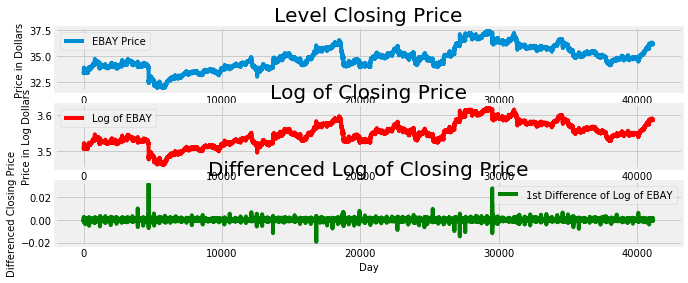

In [43]:
# Plotting the series and its transformation to check for stationarity

fig, ax = plt.subplots(figsize=(10,4))

plt.subplot(3, 1, 1)
plt.plot(data.EBAY, label = "EBAY Price")
plt.title("Level Closing Price", size = 20,)
plt.ylabel("Price in Dollars", size = 10)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data.logEBAY, label = 'Log of EBAY', color = 'r')
plt.title("Log of Closing Price", size = 20,)
plt.ylabel("Price in Log Dollars", size = 10)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot( data.diflogEBAY, label = '1st Difference of Log of EBAY', color = 'g')
plt.title("Differenced Log of Closing Price", size = 20,)
plt.ylabel("Differenced Closing Price", size = 10)
plt.xlabel('Day', size = 10)
plt.legend()

In [44]:
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(data.diflogEBAY, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -30.612061
p-value                            0.000000
# Lags Used                       46.000000
Number of Observations Used    41117.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


#### Since p-value = 0, this log-first-difference series is STATIONARY; we can now proceed with ARIMA modeling

In [45]:
# Check for autocorrelation
sm.stats.durbin_watson(df['diflogEBAY'].dropna())

2.080135616097314

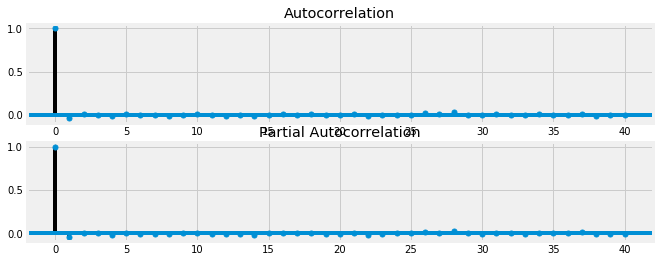

In [46]:
### DW is close to 2, so there is minimum autocorrelation

# Lets plot ACF and PACF plots

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['diflogEBAY'].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['diflogEBAY'], lags=40, ax=ax2)

In [47]:
# To systematically find the ARIMA model parameters

ararray = (data.logEBAY.dropna().as_matrix())

p=0
q=0
d=1
pdq=[]
aic=[]

for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(ararray, (p,d,q)).fit()
            x = model.aic
            x1 = (p,d,q)
            
            print (x1, x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass
                        
keys = pdq
values = aic
d = dict(zip(keys, values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print ("Best Model is :", (p,d,q))

C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(0, 1, 0) -485267.88238496054
(0, 1, 1) -485332.04789210233
(0, 1, 2) -485332.4589414717
(1, 1, 0) -485332.9826173685
(1, 1, 1) -485332.29654011055
(1, 1, 2) -485330.5678392519
(2, 1, 0) -485332.55766799295
(2, 1, 1) -485330.5553198412
(2, 1, 2) -485328.5815535492
Best Model is : (1, 1, 0)


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [48]:
p, d, q

(1, 1, 0)

#### Use the identified parameters to fit the ARIMA model

In [50]:
ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()

In [51]:
data.loc[1:, 'predict'] = np.exp(ARIMIAmod.predict(typ='levels'))
data.head()

,DATE,DATE_F,EBAY,logEBAY,diflogEBAY,predict
0,1491226200,2017-04-03 19:00:00,33.3975,3.508481,0.000075,NaN
1,1491226260,2017-04-03 19:01:00,33.3950,3.508406,-0.000449,33.397564
2,1491226320,2017-04-03 19:02:00,33.4100,3.508855,0.002247,33.395167
3,1491226380,2017-04-03 19:03:00,33.3350,3.506608,-0.001948,33.409461
4,1491226440,2017-04-03 19:04:00,33.4000,3.508556,-0.000898,33.338090


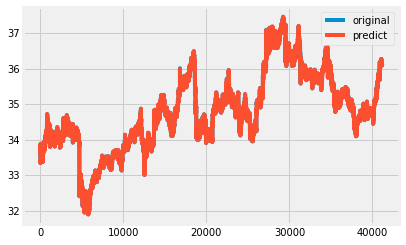

In [52]:
plt.plot(data['EBAY'][1:], label='original')
plt.plot(data.predict[1:], label='predict')
plt.legend()

In [53]:
numofsteps = 10
stepahead = ARIMIAmod.forecast(numofsteps)[0]
ferrors = ARIMIAmod.forecast(numofsteps)[2]
ferrors

array([[3.58582026, 3.58843081],
       [3.58531837, 3.58893651],
       [3.58492775, 3.58933095],
       [3.58459726, 3.58966526],
       [3.58430558, 3.58996076],
       [3.58404164, 3.59022852],
       [3.58379881, 3.59047518],
       [3.58357273, 3.59070508],
       [3.58336038, 3.59092125],
       [3.58315953, 3.59112592]])

In [54]:
data['error'] = (data['EBAY'] - data['predict'])
data['sqrError'] = np.square(data['error'])
data['absError'] = np.abs(data['error'])
data.head()

,DATE,DATE_F,EBAY,logEBAY,diflogEBAY,predict,error,sqrError,absError
0,1491226200,2017-04-03 19:00:00,33.3975,3.508481,0.000075,NaN,NaN,NaN,NaN
1,1491226260,2017-04-03 19:01:00,33.3950,3.508406,-0.000449,33.397564,-0.002564,0.000007,0.002564
2,1491226320,2017-04-03 19:02:00,33.4100,3.508855,0.002247,33.395167,0.014833,0.000220,0.014833
3,1491226380,2017-04-03 19:03:00,33.3350,3.506608,-0.001948,33.409461,-0.074461,0.005544,0.074461
4,1491226440,2017-04-03 19:04:00,33.4000,3.508556,-0.000898,33.338090,0.061910,0.003833,0.061910


Text(0.5,0,'Month')

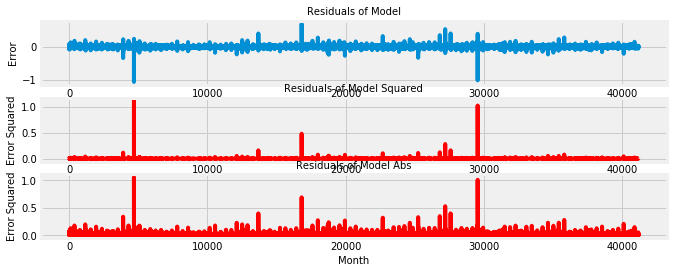

In [55]:
fig, ax = plt.subplots(figsize=(10,4))

plt.subplot(3, 1, 1)
plt.plot(data.error, label = "Residual")
plt.title("Residuals of Model", size = 10,)
plt.ylabel("Error", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 2)
plt.plot(data.sqrError, label = 'Residual Squared', color = 'r')
plt.title("Residuals of Model Squared", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 3)
plt.plot(data.absError, label = 'Residual Squared', color = 'r')
plt.title("Residuals of Model Abs", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

Text(0,0.5,'ACF')

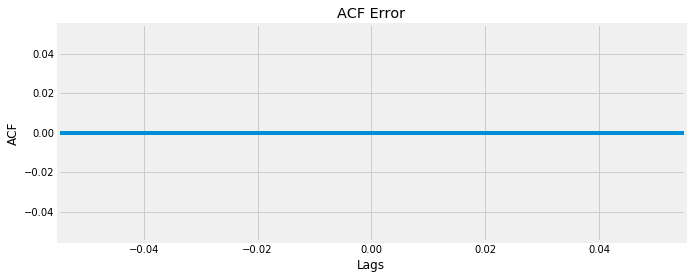

In [56]:
fig, ax = plt.subplots(figsize=(10,4))

plot_acf(data.error, lags = 25, ax = ax)
ax.set_title('ACF Error')
ax.set_xlabel('Lags')
ax.set_ylabel('ACF')


Text(0,0.5,'ACF')

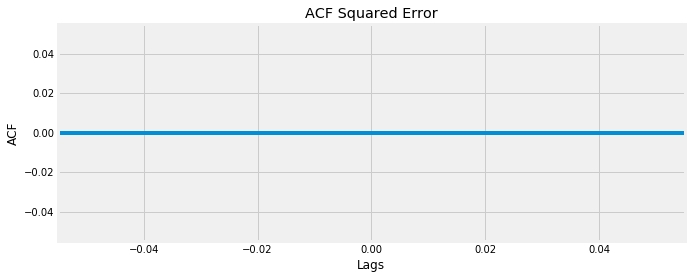

In [57]:
fig, ax = plt.subplots(figsize=(10,4))

plot_acf(data.sqrError, lags = 25, ax = ax)
ax.set_title('ACF Squared Error')
ax.set_xlabel('Lags')
ax.set_ylabel('ACF')

#### Now, to run the ARIMA model on test data

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44


C:\Users\krishnam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98


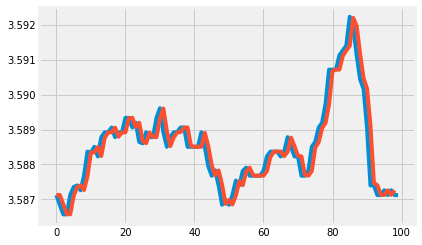

In [58]:
test = test.reset_index()
test_logEBAY = list(test.logEBAY.values)

ararray = list(data.logEBAY.values)
test_predict = []
for i in range(99):
    print(i)
    ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()
    test_predict.append(ARIMIAmod.forecast(1)[0])
    ararray.append(test_logEBAY[i])
    
plt.plot(test_logEBAY)
plt.plot(np.array(test_predict).ravel())

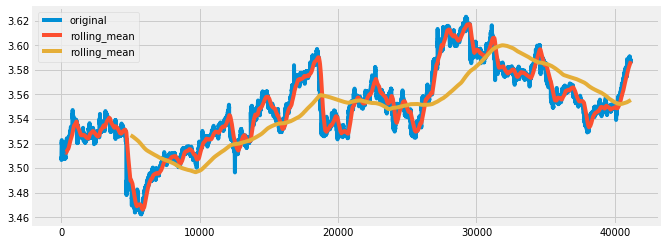

In [59]:
plt.figure(figsize=(10,4))
plt.plot(data.logEBAY, label='original')
plt.plot(data.logEBAY.rolling(300).mean(), label='rolling_mean')
plt.plot(data.logEBAY.rolling(5000).mean(), label='rolling_mean')
plt.legend()

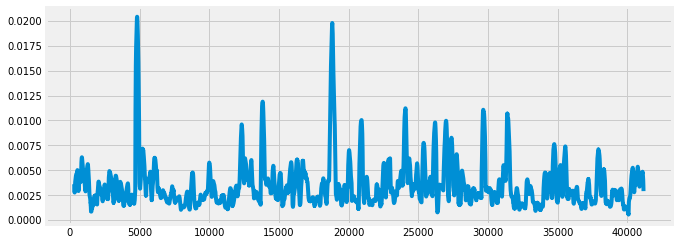

In [60]:
plt.figure(figsize=(10,4))
plt.plot(data.logEBAY.rolling(300).std())

In [61]:
data.head()

,DATE,DATE_F,EBAY,logEBAY,diflogEBAY,predict,error,sqrError,absError
0,1491226200,2017-04-03 19:00:00,33.3975,3.508481,0.000075,NaN,NaN,NaN,NaN
1,1491226260,2017-04-03 19:01:00,33.3950,3.508406,-0.000449,33.397564,-0.002564,0.000007,0.002564
2,1491226320,2017-04-03 19:02:00,33.4100,3.508855,0.002247,33.395167,0.014833,0.000220,0.014833
3,1491226380,2017-04-03 19:03:00,33.3350,3.506608,-0.001948,33.409461,-0.074461,0.005544,0.074461
4,1491226440,2017-04-03 19:04:00,33.4000,3.508556,-0.000898,33.338090,0.061910,0.003833,0.061910


In [62]:
import numpy as np

def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100

print("MFE = ", mean_forecast_err(data.EBAY, data.predict))
print("MAE = ", mean_absolute_err(data.EBAY, data.predict))

MFE =  2.1022448973782067e-07
MAE =  6.048511758823654e-09


#### Mean Forecast error is practically zero; this shows that ARIMA is a great fit

#### In this project, ARIMA (p, d, q) models have been successfully demonstrated for the 5 stocks - AAPL, ADP, CBOE, CSCO, EBAY